# Problem 2: Spectral Clustering.

**1. Compute the “Laplacian matrix”, L = D−A, where D is a diagonal matrix with Dii =
$\sum$
j Aij
for all i. Argue that this matrix is positive semidefinite**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def compute_laplacian(A):
    m, n = A.shape
    D = np.zeros((m, m))
    for i in range(m):       
        D[i, i] = A[i].sum()
    return D - A

In [3]:
def compute_similarity_matrix(X, sigma):
    shape = X.shape
    if len(shape) == 2:
        m, n = shape
    else:
        m = shape[0]
    K = np.zeros((m, m))
    X_sq = -2 * np.dot(X, X.T)
    X_sq = X_sq.astype(np.float64)
    X_sq += (X ** 2).sum(axis=1).reshape(-1, 1)
    X_sq += (X ** 2).sum(axis=1)
    K = X_sq / (-2 * (sigma ** 2))
    np.exp(K, K)
    return K

**2. Compute the eigenvectors of the Laplacian using eig() in MATLAB (numpy in Python).**

**3. Construct a matrix V ∈ R
n×k whose columns are the eigenvectors that correspond to the k
smallest eigenvalues of L.**

**4. Let y1, . . . , yn denote the rows of V . Use the kmeans() algorithm in MATLAB (scikit-learn
in Python) to cluster the rows of V into clusters S1, . . . , Sk.**

**5. The final clusters C1, . . . , Ck should be given by assigning vertex i of the input set to cluster
Cj if yi ∈ Sj .**

In [4]:
def form_clusters(labels, X, K):
    clusters = {}
    for i in range(len(X)):
        clusters[labels[i]] = X[i]
    return clusters

def spectral_clustering(A, K=2):    
    L  =  compute_laplacian(A)
    eigen_val, eigen_vectors = np.linalg.eigh(L)
    idx = eigen_val.argsort()[0:K]
    k_eigen_val = eigen_val[idx]
    V = eigen_vectors[:,idx]
    V = np.nan_to_num(V)
    spectral = KMeans(n_clusters=K).fit(V)
    labels = spectral.labels_
    clusters = form_clusters(labels, V, K)
    return clusters, labels

## A Simple Comparison

**1. Use the spectral clustering algorithm above to compute the clustering for the matrix of twodimensional points returned by the function circs() (attached to this problem set) above
with k = 2 and different values of σ.**

In [5]:
def circs():
    
    #X = zeros(2,100);
    #y = 0;
    #for i = 0:pi/25:2*pi
        #y = y + 1;
        #X(1, y) = cos(i);
        #X(2, y) = sin(i);
    #end
    #for i = 0:pi/25:2*pi
        #y = y + 1;
        #X(1, y) = 2*cos(i);
        #X(2, y) = 2*sin(i);
    #end

    
    X = np.zeros((2, 100))
    y = 0

    for i in np.arange(0, 2*np.pi, np.pi/25.0):
        X[0, y] = np.cos(i)
        X[1, y] = np.sin(i)
        y += 1

    for i in np.arange(0, 2*np.pi, np.pi/25.0):
        X[0, y] = 2*np.cos(i)
        X[1, y] = 2*np.sin(i)
        y += 1
    return X

In [6]:
X = circs().T
K = 2

In [7]:
sigma_list = [0.01, 0.1, 1, 10, 100]

Laplacian Computed
Eigen values computed


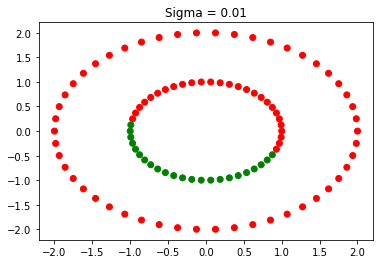

Laplacian Computed
Eigen values computed


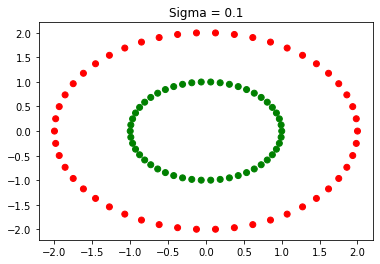

Laplacian Computed
Eigen values computed


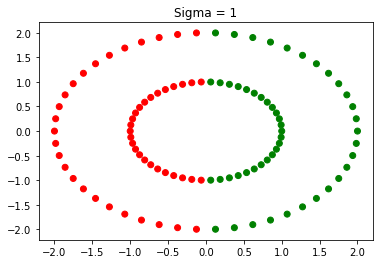

Laplacian Computed
Eigen values computed


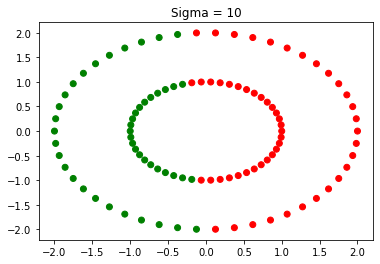

Laplacian Computed
Eigen values computed


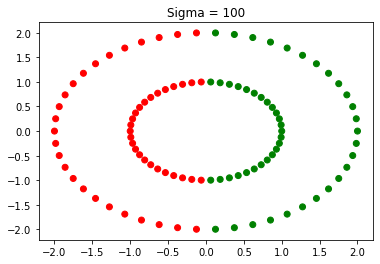

In [8]:
for sigma in sigma_list:
    A = compute_similarity_matrix(X, sigma)
    clusters, labels = spectral_clustering(A, K)
    label_colors = ['r' if l else 'g' for l in labels]
    plt.title(f'Sigma = {sigma}')
    plt.scatter(X[:, 0], X[:, 1], c=label_colors)
    plt.show()

**Use the k-means algorithm in MATLAB/Python to
compute an alternative clustering.**

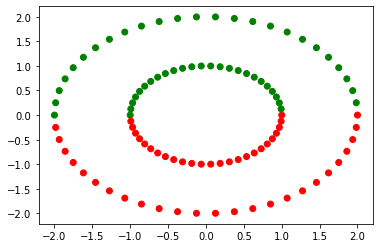

In [9]:
kmeans = KMeans(n_clusters=K).fit(X)
label_color = ['r' if l else 'g' for l in kmeans.labels_]
plt.scatter(X[:, 0], X[:, 1], c=label_color)
plt.show()

**3. Find a choice of σ such that the spectral method outperforms k-means. How do you know
that there is no k-means solution (i.e., a choice of centers and clusters) that performs this
well? Include the output of your code in your submission**

$\sigma = 0.1$ produces a good clustering compared to k-means

k-means is well suited for linearly separable data. This dataset with k = 2 is not linearly separable and k-means will perform poorly. However, spectral clustering is similar to applying feature map to data and then performing k-means clustering on higher dimensions where the data would be linearly separable. 

## Partitioning Images

**1. We can use the same spectral technique to partition images. Here, we consider each pixel of
a grayscale image as a single intensity and construct a similarity matrix for pairs of pixels
just as before**

**2. Perform the same comparison of spectral clustering and k-means as before using the image
bw.jpg that was attached as part of the homework. Again, set k = 2. You can use imread()
to read an image from a file in MATLAB.**

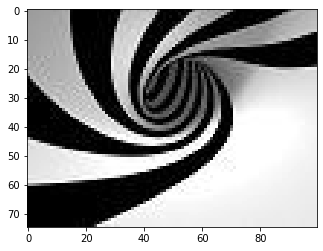

In [10]:
img = plt.imread('bw.jpg')
plt.imshow(img, cmap='gray')
h, w = img.shape
img = img.ravel()
img = img.reshape(-1,1)

In [16]:
for sigma in sigma_list:
    print(f"computing for Sigma = {sigma}")
    A = compute_similarity_matrix(img, sigma)
    clusters, labels = spectral_clustering(A, K)
    image_labels = np.array(labels).astype(np.float)
    image_labels = np.reshape(image_labels, (h, w))
    plt.imsave(f'bw{sigma}.png',image_labels)

computing for Sigma = 0.01


/home/xnkr/ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


computing for Sigma = 0.1


/home/xnkr/ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


computing for Sigma = 1
computing for Sigma = 10
computing for Sigma = 100


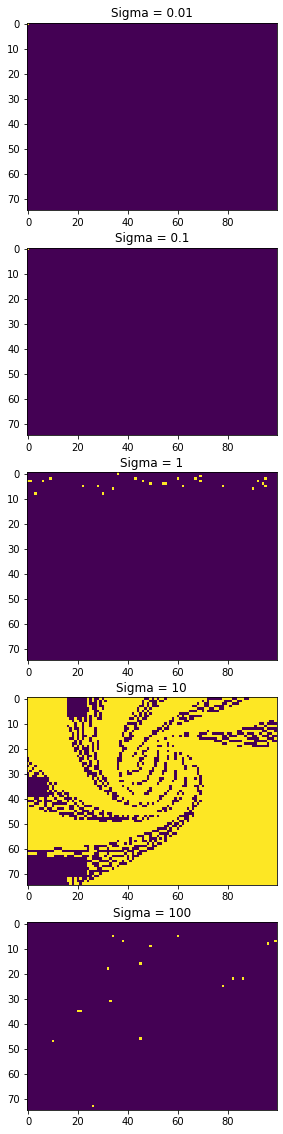

In [41]:
fig,a =  plt.subplots(5,1,figsize=(20,20))
it = 0
for i in range(5):
    s = sigma_list[i]
    k = plt.imread(f'bw{s}.png')
    a[i].set_title(f'Sigma = {s}')
    a[i].imshow(k)
plt.show()

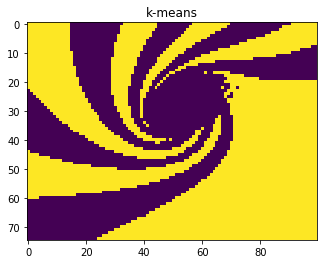

In [25]:
kmeans = KMeans(n_clusters=2).fit(img)
clusters_kmeans = form_clusters(kmeans.labels_, img, K)
image_labels = np.reshape(kmeans.labels_, (75, 100))
plt.imsave('bw-kmeans.jpg',image_labels)
plt.title('k-means')
plt.imshow(image_labels)